# IMPROVING LEAD GENERATION AT EUREKA FORBES 

Eureka Forbes, part of the conglomerate Shapoorji Pallonji Group, is currently one of the world's largest direct sales company known for its water purifier brand Aquaguard with a turnover of more than INR 30 billion. The company is estimated to have a customer base of 20 million across 53 countries. The company's distribution channel includes a direct sales force of dealers, institutional channels, business partner network and a rural channel across 1500 cities and towns in India. The company's previous customer acquisition model ensured that interested customers were individually visited for demonstration of the product and for completion of purchase. While this made the company a household name, it kept the acquisition costs on the higher side. With the imminence of online retailing, the brand had been taking steps to establish their digital presence and build a stable online sales channel. The company website (www.eurekaforbes.com) attracts online traffic from various sources such as organic searches, google ads, email campaigns, etc. The company has started to use this click stream data to build a rich database of visitor acquisition factors and behavioral variables such as session duration, device category, pages visited, lead forms filled, etc. using the Google Analytics Reporting API. The company identifies these visitors as potential customers and is actively deploying remarketing campaigns with optimism to convert them. 

**Source**: https://store.hbr.org/product/improving-lead-generation-at-eureka-forbes-using-machine-learning-algorithms/IMB779

The business goal is clearly defined for the company – they want to target potential customers while keeping
the cost per lead (CPL) as low as possible. For Kashif Kudalkar, the Deputy General Manager for Digital
Marketing and Analytics, the task is to achieve better conversion at lower costs. This is achievable when
the target audience is narrowed down to a sizeable number for remarketing campaigns. Kashif wants to use
the collected behavioral and visitor data to achieve the following objectives:

1. Find the target audience with a high probability of submitting a lead and eventually converting.
2. Segment the visitor audience into buckets based on their activity for designing better advertising and
remarketing campaigns.
3. Finally, have a probability score that can be used to run a personalized campaign for users/segments

## Loading Dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

In [3]:
eureka_df_v3 = pd.read_csv('https://raw.githubusercontent.com/manaranjanp/IIMBClasses/main/classification/eureka_encoded_csv.zip')

In [4]:
eureka_df_v3.head(5)

,DemoReqPg_CallClicks_evt_count,air_purifier_page_top,bookdemo_in_7days,bounces,checkout_page_top,contactus_top,customer_service_amc_login_top,customer_service_request_login_top,demo_page_top,dsls,...,region_Rajasthan,region_Tamil Nadu,region_Telangana,region_Uttar Pradesh,region_Uttarakhand,region_West Bengal,sourceMediumFinal_facebook_social,sourceMediumFinal_google_cpc,sourceMediumFinal_google_organic,sourceMediumFinal_referral
0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0,0,1,0,0,0,0,0,1,0
1,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,7.0,6,...,0,0,0,0,0,0,0,1,0,0
2,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0,1,0,0,0,0,0,0,1,0
3,0.0,0.0,0,0.0,0.0,0.0,64.0,0.0,49.0,0,...,0,0,0,0,0,0,0,1,0,0
4,1.0,0.0,0,0.0,0.0,0.0,0.0,0.0,36.0,0,...,0,0,0,0,0,0,0,1,0,0


In [5]:
eureka_df_v3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682037 entries, 0 to 682036
Data columns (total 75 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   DemoReqPg_CallClicks_evt_count          682037 non-null  float64
 1   air_purifier_page_top                   682037 non-null  float64
 2   bookdemo_in_7days                       682037 non-null  int64  
 3   bounces                                 682037 non-null  float64
 4   checkout_page_top                       682037 non-null  float64
 5   contactus_top                           682037 non-null  float64
 6   customer_service_amc_login_top          682037 non-null  float64
 7   customer_service_request_login_top      682037 non-null  float64
 8   demo_page_top                           682037 non-null  float64
 9   dsls                                    682037 non-null  int64  
 10  fired_DemoReqPg_CallClicks_evt          6820

In [6]:
eureka_df_v3.converted.unique()

array([0, 1])

In [7]:
eureka_df_v3.converted.value_counts()

0    679322
1      2715
Name: converted, dtype: int64

## All Features

In [8]:
X_features = list(eureka_df_v3.columns)
X_features.remove('converted')

## Splitting Dataset

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
train_set_0, test_set_0 = train_test_split(eureka_df_v3[eureka_df_v3.converted == 0],
                                       train_size = 0.99)

train_set_1, test_set_1 = train_test_split(eureka_df_v3[eureka_df_v3.converted == 1],
                                       train_size = 0.8)

In [11]:
train_set = pd.concat([train_set_0, train_set_1])
test_set = pd.concat([test_set_0, test_set_1])

In [12]:
train_set.converted.value_counts()

0    672528
1      2172
Name: converted, dtype: int64

In [13]:
test_set.converted.value_counts()

0    6794
1     543
Name: converted, dtype: int64

## Resampling to create balanced dataset

In [14]:
from sklearn.utils import resample, shuffle

In [15]:
train_label_1 = resample(train_set[train_set.converted == 1],
                             replace = True,
                             n_samples=50000)

train_label_0 = resample(train_set[train_set.converted == 0],
                             replace = False,
                             n_samples=50000)  

#train_label_0 = train_set[train_set.converted == 0]


In [16]:
# Combine majority class with upsampled minority class
train_set_resampled = pd.concat([train_label_1, train_label_0])

In [17]:
train_set_resampled = shuffle(train_set_resampled)

In [18]:
train_set_resampled.converted.value_counts()

1    50000
0    50000
Name: converted, dtype: int64

## Decision Tree Model

### Buidling the model

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
tree_v1 = DecisionTreeClassifier(max_depth=8, 
                                 criterion = 'gini')

In [21]:
tree_v1.fit(train_set_resampled[X_features], 
            train_set_resampled['converted'])

DecisionTreeClassifier(max_depth=8)

### Predicting on test set

In [22]:
y_tree_pred = tree_v1.predict(test_set[X_features])

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [24]:
cm_dt = confusion_matrix(test_set['converted'], y_tree_pred, labels = [1,0])

In [25]:
cm_plot = ConfusionMatrixDisplay(cm_dt, display_labels=['Converted', 'Not Converted'])

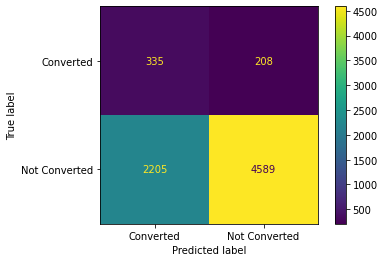

In [26]:
cm_plot.plot();

In [27]:
from sklearn.metrics import roc_auc_score, plot_roc_curve

In [28]:
y_rf_pred_prob = tree_v1.predict_proba(test_set[X_features])

In [29]:
auc_score = roc_auc_score(test_set['converted'], y_rf_pred_prob[:,1])

In [30]:
auc_score

0.7116050290284299

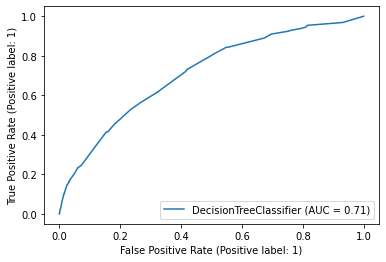

In [31]:
plot_roc_curve(tree_v1, test_set[X_features], 
               test_set['converted']);

### Finding Important Features

In [32]:
import numpy as np

In [33]:
features_df = pd.DataFrame({'feature': X_features,
                            'importance': np.round(tree_v1.feature_importances_, 3) })

In [34]:
features_df = features_df.sort_values('importance', 
                                      ascending = False)

In [35]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

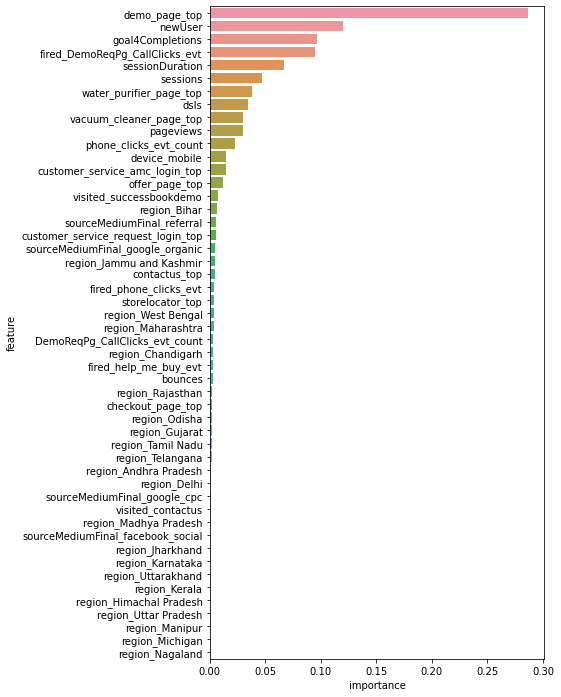

In [36]:
plt.figure(figsize=(6,12))
sn.barplot(y = 'feature', 
           x = 'importance', 
           data = features_df[0:50]);

In [37]:
features_df['cumsum'] = features_df.importance.cumsum()

In [38]:
imp_cumsum_df = features_df.sort_values('cumsum', ascending=True)

In [39]:
imp_cumsum_df = imp_cumsum_df.reset_index()

In [41]:
imp_cumsum_df

,index,feature,importance,cumsum
0,8,demo_page_top,0.287,0.287
1,17,newUser,0.120,0.407
2,14,goal4Completions,0.097,0.504
3,10,fired_DemoReqPg_CallClicks_evt,0.095,0.599
4,23,sessionDuration,0.067,0.666
...,...,...,...,...
69,16,help_me_buy_evt_count,0.000,0.998
70,51,region_Haryana,0.000,0.998
71,48,region_Chhattisgarh,0.000,0.998
72,2,bookdemo_in_7days,0.000,0.998
